# Heat Equation
## The Differential Equation
$$  \frac{\partial u}{\partial t} = -\frac{1}{16}\frac{\partial^2 u}{\partial x^2}$$
## Initial Condition
$$ u(x,0)=\sin(\pi x) $$

## Boundary Condition
$$ u(0,t)=0,  u(1,t)=0 $$

## The Difference Equation
$$ w[k+1,i] = w[k,i] + \frac{-1}{16}\frac{k}{h^2}(w[k,i+1]-2w[k,i]+w[k,i-1])$$


In [2]:
# LIBRARY
# vector manipulation
import numpy as np
# math functions
import math 

# THIS IS FOR PLOTTING

%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import warnings
warnings.filterwarnings("ignore")


(16, 11)
(16, 11)


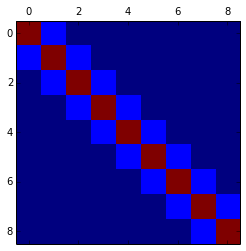

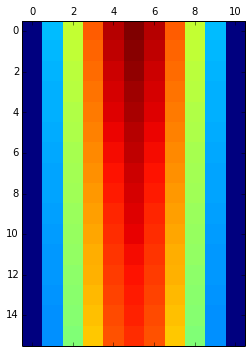

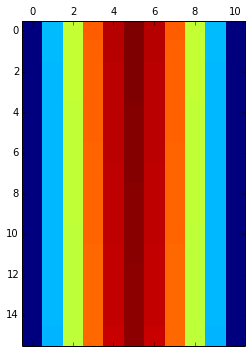

In [6]:
N=10
Nt=15
h=1/N
ht=1/1000

time=np.arange(0,1.0001,ht)

x=np.arange(0,1.0001,h)

w=np.zeros((Nt+1,N+1))
Solution=np.zeros((Nt+1,N+1))

A=np.zeros((N-1,N-1))
c=np.zeros(N-1)
b=np.zeros(N-1)
b[0]=0

# Initial Condition
for i in range (1,N):
    #w[0,i]=1-x[i]-1/np.pi*np.sin(2*np.pi*x[i])
    w[0,i]=np.sin(np.pi*x[i])
    #Solution[0,i]=1-x[i]-1/np.pi*np.sin(2*np.pi*x[i])
    Solution[0,i]=np.sin(np.pi*x[i])


# Boundary Condition
for k in range (0,Nt):
    #w[k,0]=1
    w[k,0]=0
    w[k,N]=0
    #Solution[k,0]=1
    Solution[k,0]=0
    Solution[k,N]=0


for i in range (0,N-1):
    A[i,i]=-2

for i in range (0,N-2):           
    A[i+1,i]=1
    A[i,i+1]=1
    
A=np.eye(N-1)+ht/(h*h)*(A)

fig = plt.figure(figsize=(8,4))
plt.matshow(A)
print(Solution.shape)
print(w.shape)


for k in range (1,Nt+1):
    w[k,1:(N)]=np.dot(A,w[k-1,1:(N)])
    Solution[k,1:(N)]=np.exp(-time[k])*np.sin(np.pi*x[1:N])


#print(np.dot(A,c))
fig = plt.figure(figsize=(8,4))
plt.matshow(w)
plt.matshow(Solution)